# Weak Law of Large Numbers

---

## Statement

Let $X_1, X_2, \dots$ be a sequence of independent and identically distributed (i.i.d.) random variables with finite mean
$$
\mu = \mathbb{E}[X_i].
$$
Define the sample mean:
$$
\hat{\mu}_N = \frac{1}{N} \sum_{i=1}^N X_i.
$$

The sample mean **converges in probability** to the expected value:
$$
\hat{\mu}_N \xrightarrow{p} \mu \quad \text{as } N \to \infty,
$$
which formally means:
$$
\forall \varepsilon > 0, \quad \lim_{N \to \infty} \Pr\Big(|\hat{\mu}_N - \mu| > \varepsilon \Big) = 0.
$$

## Analysis

The sample mean at sample size $n$ for trial $i$:
$$
\bar{X}_n^{(i)} = \frac{1}{n} \sum_{k=1}^n X_k^{(i)}
$$

The function simulates $m$ independent trials, generating sequences
$$
\bar{X}_1^{(i)}, \bar{X}_2^{(i)}, \ldots, \bar{X}_n^{(i)} \quad \text{where } i=1,\ldots,m
$$

In [1]:
from typing import Sequence

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def law_of_large_numbers(
    population: np.ndarray, sample_sizes: Sequence[int], num_trials: int
) -> None:
    cols = len(sample_sizes)
    rows = num_trials
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), squeeze=False)

    population_mean = population.mean()

    for i in range(rows):  # trials
        for j, sample_size in enumerate(sample_sizes):
            cumulative_means = []
            for n in range(1, sample_size + 1):
                sample = np.random.choice(population, size=n, replace=True)
                sample_mean = sample.mean()
                cumulative_means.append(sample_mean)

            final_means = (
                cumulative_means[-100:] if sample_size >= 100 else cumulative_means
            )
            mean_final = np.mean(final_means)
            var_final = np.var(final_means)

            ax = axes[i, j]
            ax.plot(range(1, sample_size + 1), cumulative_means, label=f"Trial {i + 1}")
            ax.axhline(
                population_mean,
                color="red",
                linestyle="--",
                label=f"Pop. Mean ≈ {population_mean:.2f}",
            )
            ax.set_xlabel("Sample Size")
            if j == 0:
                ax.set_ylabel("Sample Mean")
            ax.set_title(
                f"Size={sample_size}, Mean={mean_final:.2f}, Var={var_final:.4f}"
            )
            ax.legend(loc="upper right")

    fig.suptitle("Law of Large Numbers: Sample Mean Convergence & Stats")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

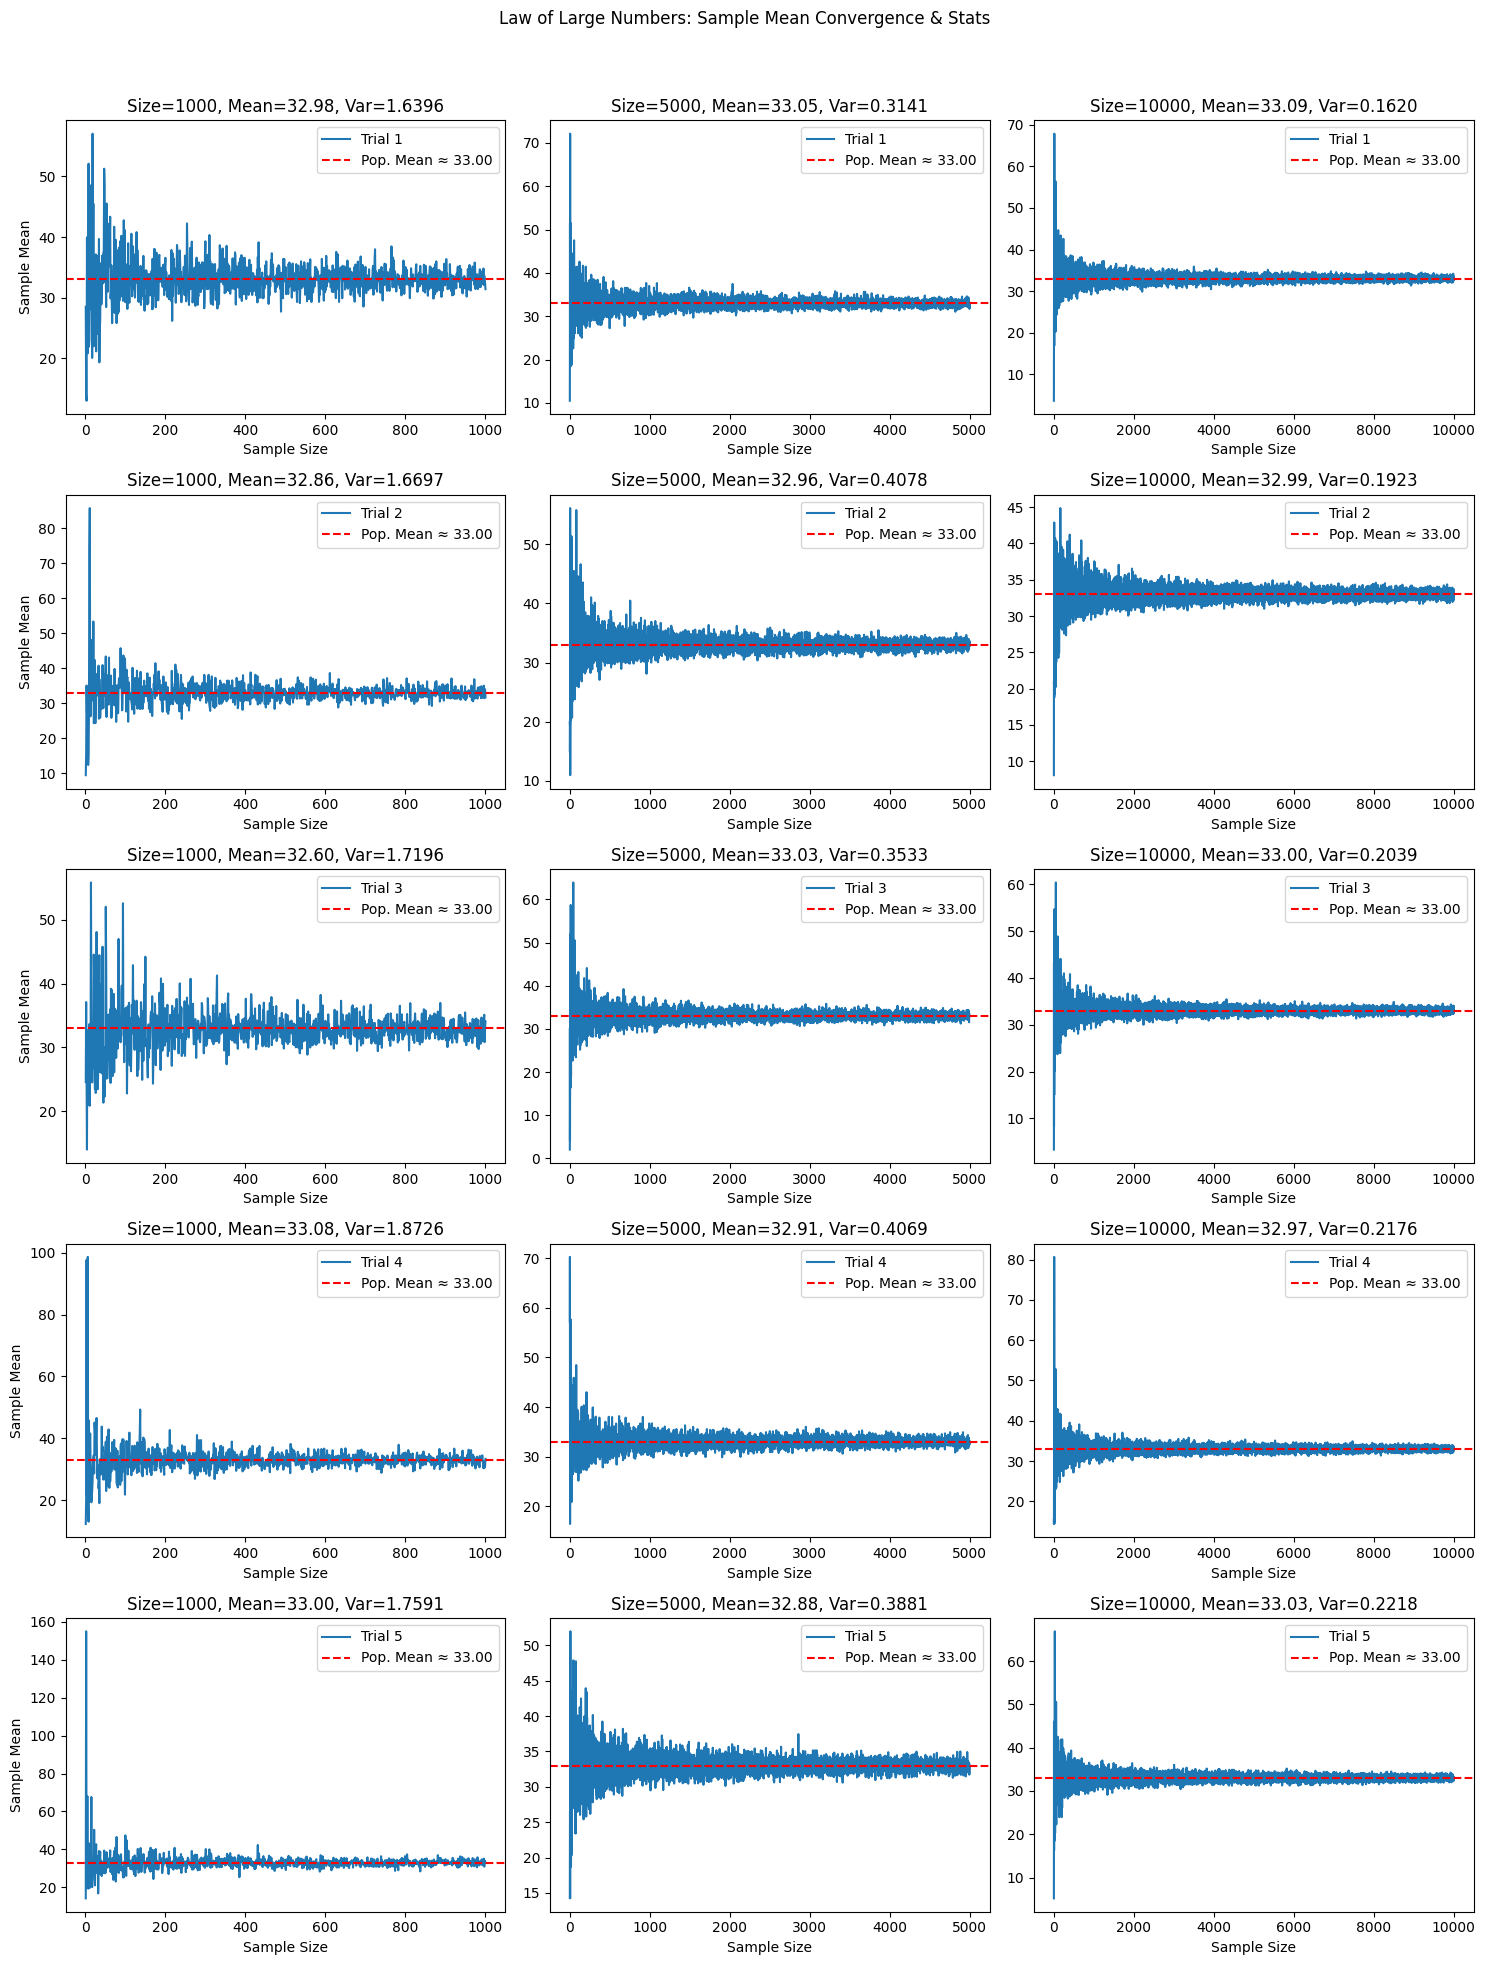

In [3]:
population = np.random.lognormal(mean=3.0, sigma=1.0, size=int(1e6))
law_of_large_numbers(
    population, sample_sizes=[int(1e3), int(5e3), int(1e4)], num_trials=5
)